# Overview
This model predicts the car the potential customer will buy basede on the region and annual income they have. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

# Visualize decision tree using matplotlib wrapper
from sklearn import tree

# Model imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel


from sklearn.model_selection import train_test_split

# Metrics imports
from sklearn import metrics

from subprocess import call

## Load Data and cleanup

In [2]:
# Import the data
df = pd.read_csv('data/cleaned_car_data.csv')


In [3]:
# Encode the Dealer_Region column
df = pd.concat([df,  pd.get_dummies(df[['Dealer_Region', 'Gender']], dtype=int)], axis=1)

df.head()

df.columns.unique()

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Dealer_Region_Aurora', 'Dealer_Region_Austin',
       'Dealer_Region_Greenville', 'Dealer_Region_Janesville',
       'Dealer_Region_Middletown', 'Dealer_Region_Pasco',
       'Dealer_Region_Scottsdale', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## Arrange Data to Feature and Matrix

The target column for this will be the Model.

In [4]:
X = df.loc[:, ['Annual Income',
               'Dealer_Region_Aurora', 'Dealer_Region_Austin',
       'Dealer_Region_Greenville', 'Dealer_Region_Janesville',
       'Dealer_Region_Middletown', 'Dealer_Region_Pasco',
       'Dealer_Region_Scottsdale', 'Gender_Female','Gender_Male', 'Price ($)']]

In [5]:
X.shape

(23905, 11)

In [6]:
y = df.loc[:, 'Model']

In [7]:
y.shape

(23905,)

## Bootstrap


In [8]:
# Set a seed for reproducibility.
np.random.seed(123)

# Create ten bootstrap samples (which will be used to select rows from the DataFrame).
samples = [np.random.choice(a=14, size=100, replace=True) for _ in range(1, 6)]

In [9]:
X.iloc[samples[0], :]

,Annual Income,Dealer_Region_Aurora,Dealer_Region_Austin,Dealer_Region_Greenville,Dealer_Region_Janesville,Dealer_Region_Middletown,Dealer_Region_Pasco,Dealer_Region_Scottsdale,Gender_Female,Gender_Male,Price ($)
13,13500,0,0,1,0,0,0,0,0,1,15000
2,1035000,0,0,1,0,0,0,0,0,1,31500
12,885000,1,0,0,0,0,0,0,0,1,9000
2,1035000,0,0,1,0,0,0,0,0,1,31500
6,1600000,0,1,0,0,0,0,0,0,1,14000
...,...,...,...,...,...,...,...,...,...,...,...
9,13500,0,0,0,0,0,0,1,1,0,15000
0,13500,0,0,0,0,1,0,0,0,1,26000
8,815000,0,0,0,0,0,1,0,0,1,82000
11,13500,0,0,0,0,0,1,0,0,1,46000


## Train, Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    test_size = .2)

# Fit

In [11]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True,
                             random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

predictions

array(['Metro', 'A6', 'Sienna', ..., '528i', 'Tacoma', 'Diamante'],
      dtype=object)

In [12]:
# Score the model
score = clf.score(X_test, y_test)
score

0.08471031165028237

In [13]:
estimator_range = [1] + list(range(10, 310, 10))

# List to store the average RMSE for each value of n_estimators:
scores = []

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

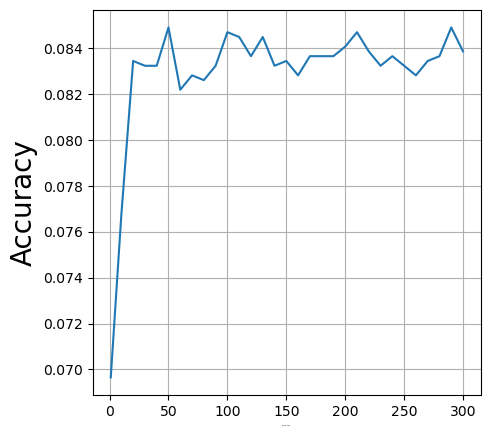

In [14]:

plt.figure(figsize = (5,5))
plt.plot(estimator_range, scores);

plt.xlabel('n_estimators', fontsize =0);
plt.ylabel('Accuracy', fontsize = 20);
plt.grid()